In [57]:
#Carlos Alberto - RA:202208260594
#Lucas Henrique - RA:202209085052
#Marcos Cristofani - RA:202208260586

##Importando a Base de Dados


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

In [59]:
base = pd.read_csv('https://github.com/LcAs78/-Data-Mining-Project-/raw/main/StudentPerformanceFactors_Atualizado.csv')

In [60]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Horas_de_estudo               6378 non-null   int64 
 1   Presenca                      6378 non-null   int64 
 2   Engajamento_parental          6378 non-null   object
 3   Acesso_a_recursos             6378 non-null   object
 4   Atividades_extracurriculares  6378 non-null   object
 5   Horas_de_sono                 6378 non-null   int64 
 6   Pontuacoes_anteriores         6378 non-null   int64 
 7   Nivel_de_motivacao            6378 non-null   object
 8   Acesso_a_internet             6378 non-null   object
 9   Sessoes_de_reforco            6378 non-null   int64 
 10  Renda_familiar                6378 non-null   object
 11  Qualidade_do_professor        6378 non-null   object
 12  Tipo_de_escola                6378 non-null   object
 13  Influencia_do_cole

In [61]:
base.head()

,Horas_de_estudo,Presenca,Engajamento_parental,Acesso_a_recursos,Atividades_extracurriculares,Horas_de_sono,Pontuacoes_anteriores,Nivel_de_motivacao,Acesso_a_internet,Sessoes_de_reforco,Renda_familiar,Qualidade_do_professor,Tipo_de_escola,Influencia_do_colega,Atividade_fisica,Deficiencia_de_aprendizado,Nivel_de_formacao_dos_pais,Distancia_da_casa,Sexo,Pontuacao_do_exame
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [62]:
base.drop(['Engajamento_parental','Acesso_a_recursos','Atividades_extracurriculares','Nivel_de_motivacao','Acesso_a_internet','Renda_familiar','Qualidade_do_professor','Tipo_de_escola','Influencia_do_colega','Deficiencia_de_aprendizado','Nivel_de_formacao_dos_pais','Distancia_da_casa','Sexo'],axis=1,inplace=True)

In [63]:
# base = pd.concat([base, Engajamento_parental,Acesso_a_recursos,Atividades_extracurriculares,Nivel_de_motivacao,Acesso_a_internet,Renda_familiar,Qualidade_do_professor,Tipo_de_escola,Influencia_do_colega,Deficiencia_de_aprendizado,Nivel_de_formacao_dos_pais,Distancia_da_casa,Sexo],axis=1)

In [64]:
base.head()

,Horas_de_estudo,Presenca,Horas_de_sono,Pontuacoes_anteriores,Sessoes_de_reforco,Atividade_fisica,Pontuacao_do_exame
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


In [65]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Horas_de_estudo        6378 non-null   int64
 1   Presenca               6378 non-null   int64
 2   Horas_de_sono          6378 non-null   int64
 3   Pontuacoes_anteriores  6378 non-null   int64
 4   Sessoes_de_reforco     6378 non-null   int64
 5   Atividade_fisica       6378 non-null   int64
 6   Pontuacao_do_exame     6378 non-null   int64
dtypes: int64(7)
memory usage: 348.9 KB


##Fazendo a Regressão Linear da Pontuação do Exame em relação as horas de estudo, presença e sessoes de reforço



In [66]:
base.corr()

,Horas_de_estudo,Presenca,Horas_de_sono,Pontuacoes_anteriores,Sessoes_de_reforco,Atividade_fisica,Pontuacao_do_exame
Horas_de_estudo,1.000000,-0.004997,0.013119,0.022492,-0.009654,0.003183,0.445104
Presenca,-0.004997,1.000000,-0.019602,-0.018083,0.012070,-0.022976,0.580259
Horas_de_sono,0.013119,-0.019602,1.000000,-0.023238,-0.011466,-0.002898,-0.017171
Pontuacoes_anteriores,0.022492,-0.018083,-0.023238,1.000000,-0.013158,-0.006694,0.174283
Sessoes_de_reforco,-0.009654,0.012070,-0.011466,-0.013158,1.000000,0.016325,0.156829
Atividade_fisica,0.003183,-0.022976,-0.002898,-0.006694,0.016325,1.000000,0.025148
Pontuacao_do_exame,0.445104,0.580259,-0.017171,0.174283,0.156829,0.025148,1.000000


<Axes: >

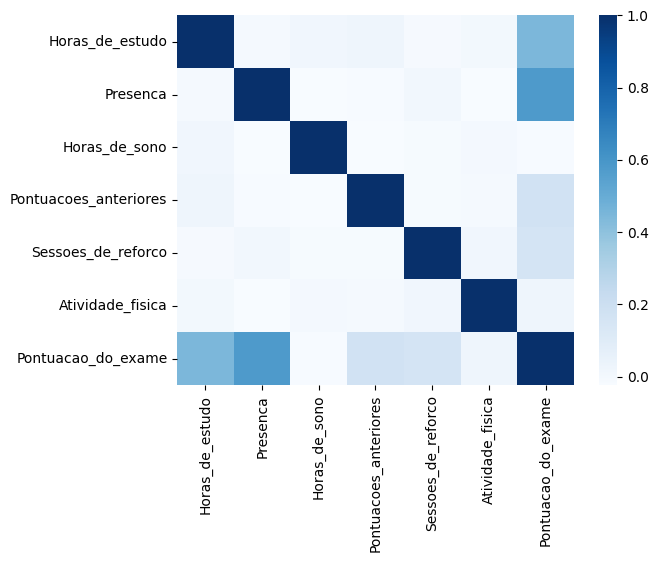

In [67]:
sns.heatmap(base.corr(),cmap='Blues')

In [68]:
y = base['Pontuacao_do_exame']
x1 = base['Horas_de_estudo']

In [69]:
x1_treinamento, x1_teste, y_treinamento, y_teste = train_test_split(x1, y, test_size = 0.3,random_state=0)

In [70]:
x1_treinamento = x1_treinamento.values.reshape(-1,1)
x1_teste = x1_teste.values.reshape(-1,1)

In [71]:
x1_teste

array([[14],
       [ 7],
       [24],
       ...,
       [28],
       [15],
       [18]])

In [72]:
y_treinamento = y_treinamento.values.reshape(-1,1)
y_teste = y_teste.values.reshape(-1,1)

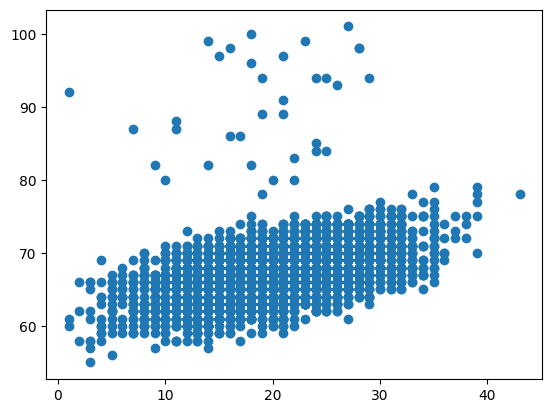

In [73]:
plt.scatter(x1_treinamento, y_treinamento)

In [74]:
regressor = LinearRegression()
regressor.fit(x1_treinamento, y_treinamento)

LinearRegression()

In [75]:
y_pred = regressor.predict(x1_teste)

print('Coefficients: \n', regressor.coef_)
print(f'Mean absolute error: {mean_absolute_error(y_teste, y_pred):.2f}')
print(f'Coefficient of determination R2: {r2_score(y_teste, y_pred):.2f}')

Coefficients: 
 [[0.28485805]]
Mean absolute error: 2.47
Coefficient of determination R2: 0.23


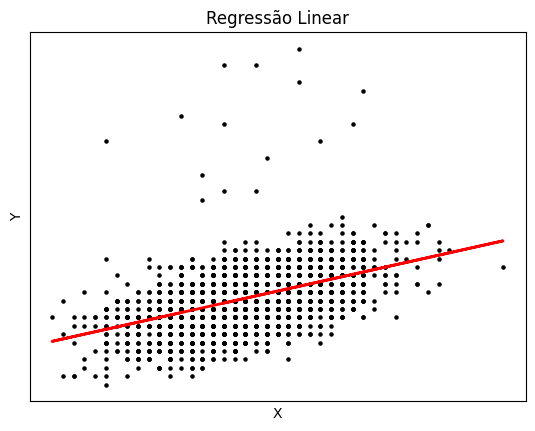

In [76]:
plt.scatter(x1_teste, y_teste, s =5, color="black")
plt.plot(x1_teste, y_pred, color="red", linewidth=2)

plt.xticks(())
plt.yticks(())
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regressão Linear')

plt.show()

##Fazendo a Regressão Linear Múltipla


<Axes: >

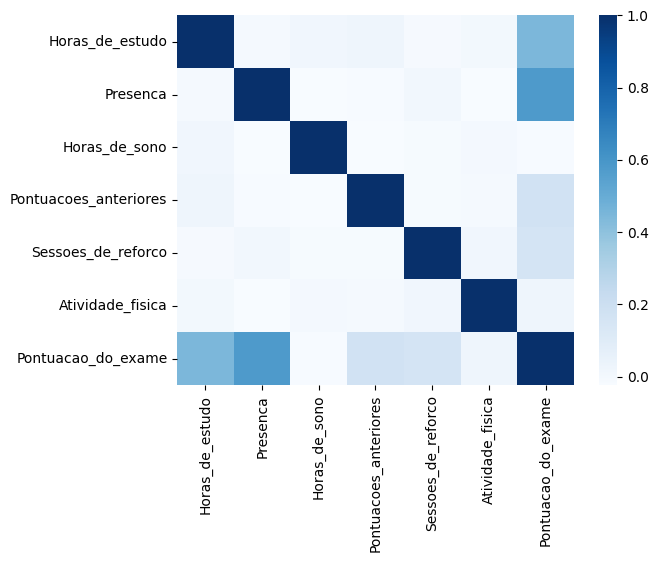

In [77]:
sns.heatmap(base.corr(),cmap='Blues')

In [78]:
base.columns

Index(['Horas_de_estudo', 'Presenca', 'Horas_de_sono', 'Pontuacoes_anteriores',
       'Sessoes_de_reforco', 'Atividade_fisica', 'Pontuacao_do_exame'],
      dtype='object')

In [79]:
X = base[['Horas_de_estudo', 'Presenca', 'Sessoes_de_reforco', 'Horas_de_sono', 'Atividade_fisica']]

In [80]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [81]:
regressor2 = LinearRegression()
regressor2.fit(X_treinamento, y_treinamento)

LinearRegression()

In [82]:
pontuacao = regressor2.predict(X_teste)

print('Coefficients: \n', regressor.coef_)
print(f'Mean absolute error: {mean_absolute_error(y_teste, pontuacao):.2f}')
print(f'Coefficient of determination R2: {r2_score(y_teste, pontuacao):.2f}')

Coefficients: 
 [[0.28485805]]
Mean absolute error: 1.43
Coefficient of determination R2: 0.59


##Testando os modelos


In [83]:
X = {'Horas_de_estudo':2, 'Presenca':90, 'Sessoes_de_reforco':4,'Horas_de_sono':9, 'Atividade_fisica':2}

df = pd.DataFrame(data = X,index=[0])

pontuacao_exame = regressor2.predict(df)

print(f'A Pontuação do exame é {pontuacao_exame[0]:.2f}')

A Pontuação do exame é 65.09
